In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt
from ml.models import SubtractNetwork, SiameseNetwork, EmbeddingNet
import torchvision.transforms as transforms

In [2]:
x_real = np.load('dataset/x_real.npz')['data']
y_real = np.load('dataset/y_real.npy')
x_val = np.load('dataset/x_val.npy')
label_val = np.load('dataset/y_val.npy')

In [3]:
checkpoint = torch.load("saved_models/model_state_SubtractNetwork_15.pt")
net = SubtractNetwork()
net.load_state_dict(checkpoint['model_state_dict'])

<All keys matched successfully>

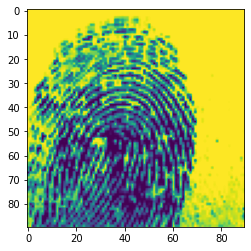

In [13]:
plt.imshow(x_val[0].squeeze())


In [4]:
from ml.utils import imshow
import torchvision.utils
from PIL import Image

In [50]:
from imgaug import augmenters as iaa
def get_augmenters():
    return iaa.Sequential([
        iaa.GaussianBlur(sigma=(0, 0.5)),
        iaa.Affine(
            scale={"x": (0.9, 1.1), "y": (0.9, 1.1)},
            translate_percent={"x": (-0.1, 0.1), "y": (-0.1, 0.1)},
            rotate=(-30, 30),
            order=[0, 1],
            cval=255
        )
    ], random_order=True)

aug = get_augmenters()

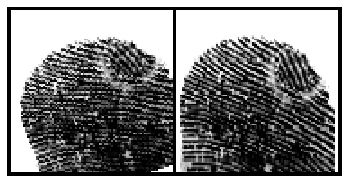

In [67]:
#i1 = Image.open('f1.png')
#i2 = Image.open('f2.png')
# to_tensor = transforms.Compose([
#     transforms.Grayscale(),
#     transforms.Resize((90,90)),
#     transforms.ToTensor()]
# )
i1 = x_val[0]
i2 = x_val[0]
to_tensor = transforms.Compose([
    transforms.ToPILImage(),
    transforms.RandomOrder([
           transforms.RandomAffine(
            degrees =30,
            translate=(0.1,0.1),
            scale=(0.9, 1.1),     
            fillcolor=255),
            transforms.GaussianBlur(3,sigma=(0.1,0.5)),
    ]),
    transforms.ToTensor()]
)
x1 = torch.unsqueeze(to_tensor(i1),0)
x2 = torch.unsqueeze(transforms.ToTensor()(aug.augment_image(i2)),0)
concat = torch.cat((x1, x2), 0)
imshow(torchvision.utils.make_grid(concat))


In [24]:
#to_tensor = transforms.ToTensor()

prob = torch.sigmoid(net(x1,x2)).item()
prob

0.9944432377815247

In [8]:
x_val[0].shape

(90, 90, 1)